<a href="https://colab.research.google.com/github/azmiak/Kuliah-Deep-Learning/blob/main/Week%204%20/%20Tugas%20/%20Tensorflow_IMDB_RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_words = 30000
maxlen = 433

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#RNN

In [3]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    SimpleRNN(128, return_sequences=True),
    Dropout(0.3),
    SimpleRNN(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 114ms/step - accuracy: 0.4967 - loss: 0.7189 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.5301 - loss: 0.6890 - val_accuracy: 0.7359 - val_loss: 0.5416
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.7980 - loss: 0.4484 - val_accuracy: 0.7025 - val_loss: 0.5894
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.7754 - loss: 0.4844 - val_accuracy: 0.6952 - val_loss: 0.5805
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.8458 - loss: 0.3706 - val_accuracy: 0.7926 - val_loss: 0.4988
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9446 - loss: 0.1596 - val_accuracy: 0.8262 - val_loss: 0.6565
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9614 - loss: 0.1123 - val_accuracy: 0.8082 - val_loss: 0.6599
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9909 - loss: 0.0309 -

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step
Accuracy: 0.7546
Precision: 0.7716
Recall: 0.7234
F1 Squared: 0.5576
AUC: 0.8286


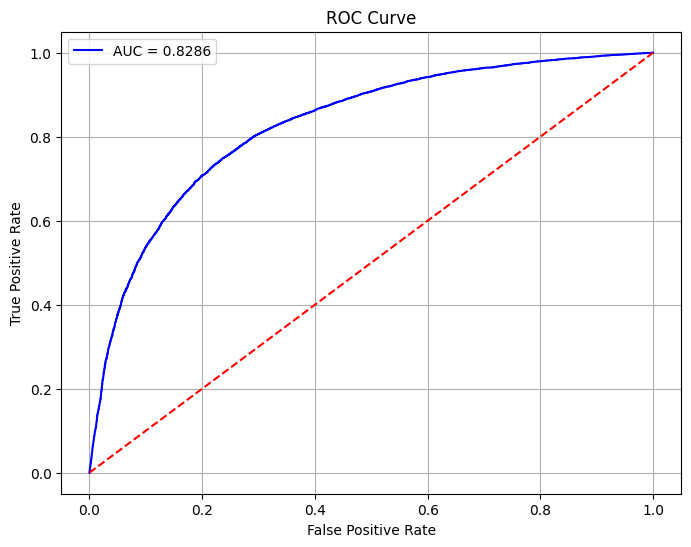

In [5]:
# Predictions
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_squared = f1_score(y_test, y_pred) ** 2
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

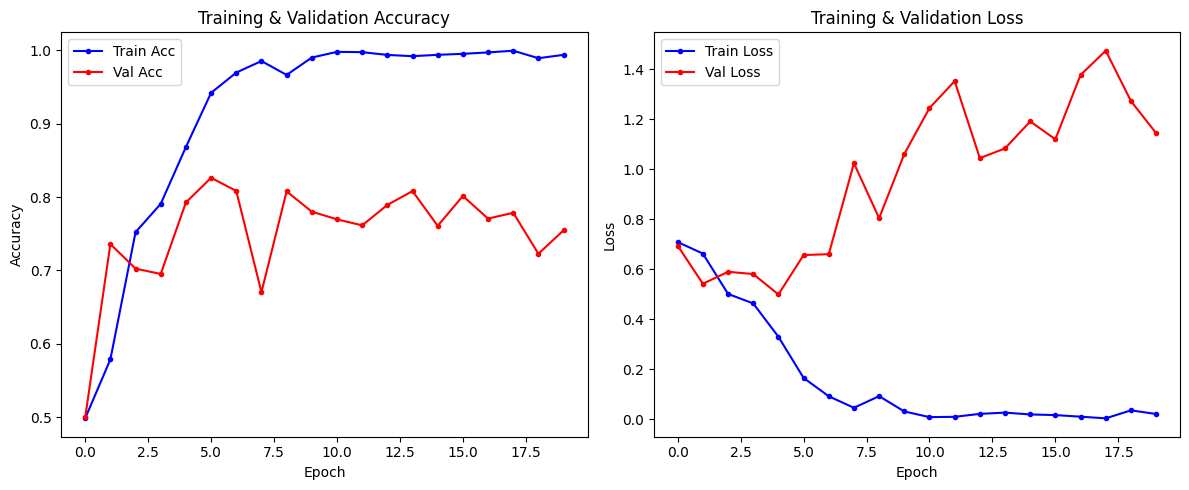

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='.', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='.', color='red')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='.', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', marker='.', color='red')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#LSTM

In [7]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 30000
maxlen = 433

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout

model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 82ms/step - accuracy: 0.7027 - loss: 0.5390 - val_accuracy: 0.8522 - val_loss: 0.3546
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.9203 - loss: 0.2150 - val_accuracy: 0.8759 - val_loss: 0.2996
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.9609 - loss: 0.1185 - val_accuracy: 0.8138 - val_loss: 0.4890
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.9700 - loss: 0.0891 - val_accuracy: 0.8566 - val_loss: 0.4112
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.9796 - loss: 0.0613 - val_accuracy: 0.8609 - val_loss: 0.5468
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.9748 - loss: 0.0760 - val_accuracy: 0.8516 - val_loss: 0.5453
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9852 - loss: 0.0436 - val_accuracy: 0.8508 - val_loss: 0.7221
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.9898 - loss: 0.0337 - 

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step
Accuracy: 0.8467
Precision: 0.8120
Recall: 0.9022
F1 Squared: 0.7306
AUC: 0.9162


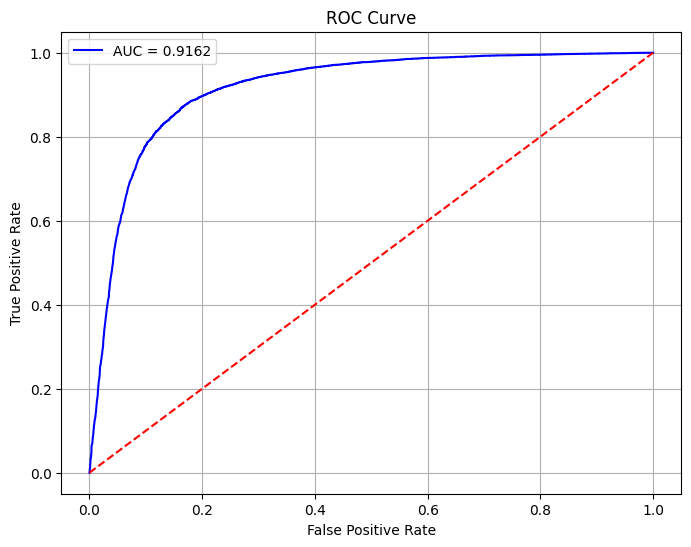

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_squared = f1_score(y_test, y_pred) ** 2
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


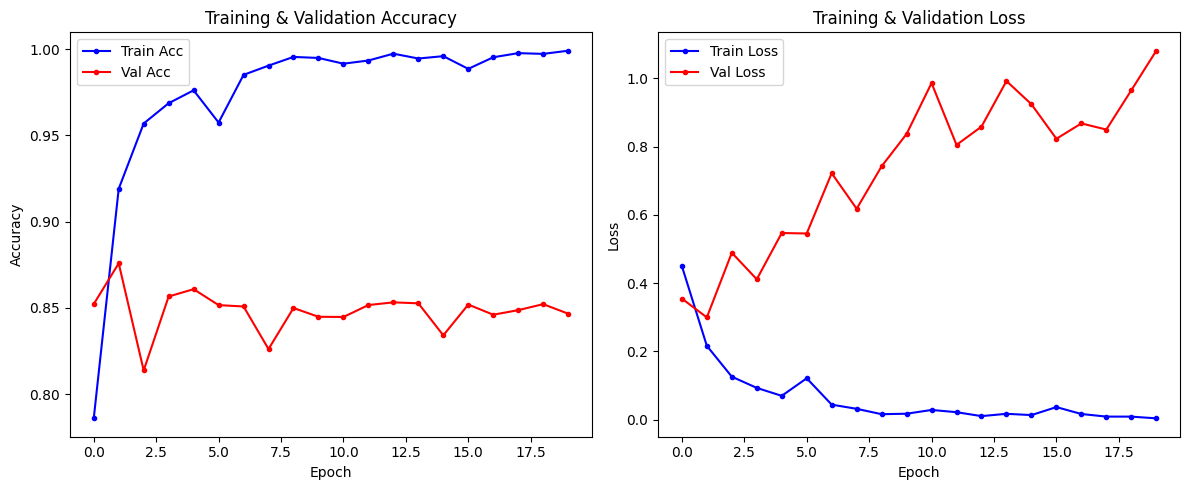

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='.', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='.', color='red')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='.', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', marker='.', color='red')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#GRU

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 30000
maxlen = 433

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    GRU(128, return_sequences=True),
    Dropout(0.3),
    GRU(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.6352 - loss: 0.6173 - val_accuracy: 0.7992 - val_loss: 0.4308
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.8790 - loss: 0.3046 - val_accuracy: 0.8622 - val_loss: 0.3371
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.9315 - loss: 0.1835 - val_accuracy: 0.8598 - val_loss: 0.3644
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.9625 - loss: 0.1085 - val_accuracy: 0.8582 - val_loss: 0.4002
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9794 - loss: 0.0637 - val_accuracy: 0.8542 - val_loss: 0.4882
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.9899 - loss: 0.0358 - val_accuracy: 0.8322 - val_loss: 0.5515
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9886 - loss: 0.0344 - val_accuracy: 0.8345 - val_loss: 0.6407
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 110ms/step - accuracy: 0.9914 - loss: 0.0253 -

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step
Accuracy: 0.8536
Precision: 0.8603
Recall: 0.8444
F1 Squared: 0.7264
AUC: 0.9298


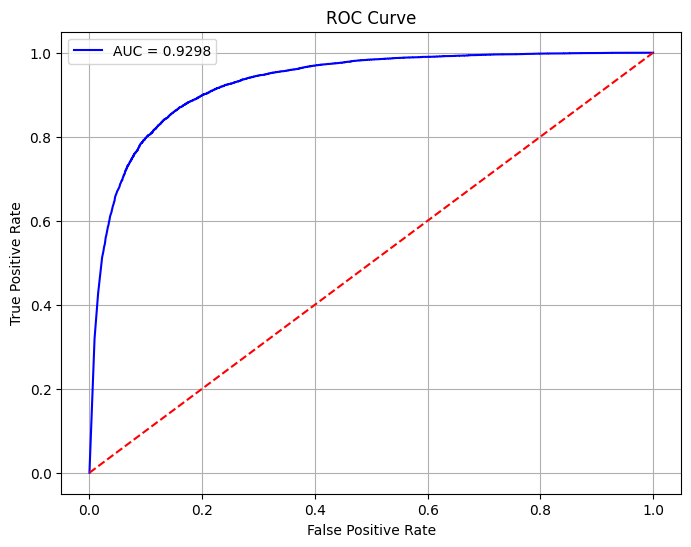

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_squared = f1_score(y_test, y_pred) ** 2
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


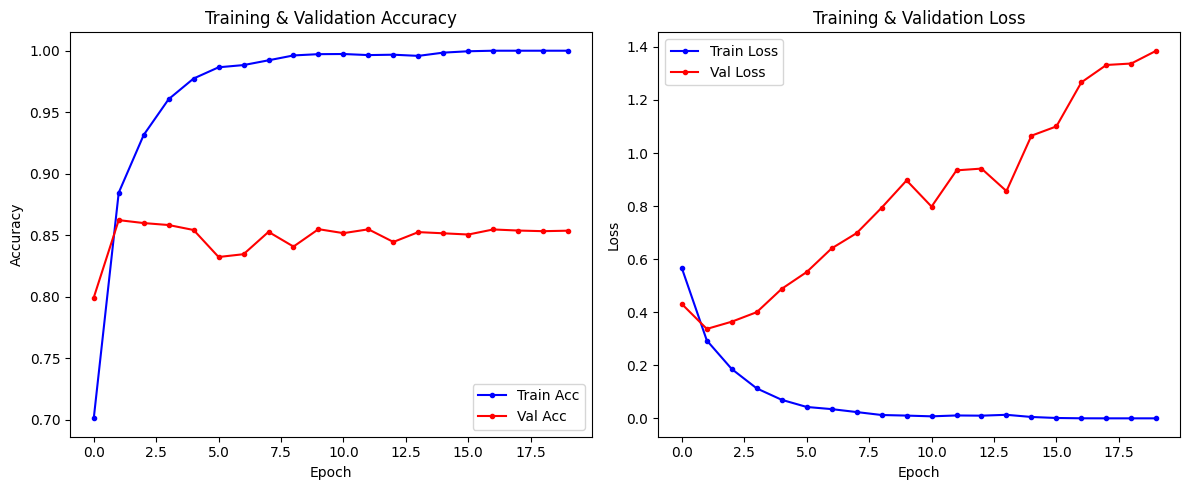

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='.', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='.', color='red')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='.', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', marker='.', color='red')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#Persamaan Matematika pada DL

---

##1. RNN

Model RNN mempertimbangkan urutan dengan memori internal:

$h_t = \tanh(W_h h_{t-1} + W_x x_t + b)$

- \($ h_t $\): Hidden state saat waktu \($ t $\)
- \($ x_t $\): Input saat waktu \($ t $\)
- \($ W_h, W_x $\): Bobot hidden dan input
- \($ b $\): Bias

---

##2. LSTM

LSTM memiliki mekanisme gate untuk menangani long-term dependency:

\begin{aligned}
f_t &= \sigma(W_f [h_{t-1}, x_t] + b_f) \quad \text{(forget gate)} \\
i_t &= \sigma(W_i [h_{t-1}, x_t] + b_i) \quad \text{(input gate)} \\
\tilde{C}_t &= \tanh(W_C [h_{t-1}, x_t] + b_C) \quad \text{(candidate state)} \\
C_t &= f_t * C_{t-1} + i_t * \tilde{C}_t \quad \text{(cell state)} \\
o_t &= \sigma(W_o [h_{t-1}, x_t] + b_o) \quad \text{(output gate)} \\
h_t &= o_t * \tanh(C_t) \quad \text{(hidden state)}
\end{aligned}

---

##3. GRU

GRU adalah versi lebih sederhana dari LSTM:

\begin{aligned}
z_t &= \sigma(W_z [h_{t-1}, x_t]) \quad \text{(update gate)} \\
r_t &= \sigma(W_r [h_{t-1}, x_t]) \quad \text{(reset gate)} \\
\tilde{h}_t &= \tanh(W [r_t * h_{t-1}, x_t]) \quad \text{(candidate state)} \\
h_t &= (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t \quad \text{(new state)}
\end{aligned}

---

##4. Binary Cross-Entropy Loss

Untuk klasifikasi biner, fungsi loss adalah:

\[
\$mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right]
$\]

- \($ y_i $\): Label sebenarnya (0 atau 1)
- \($ \hat{y}_i $\): Prediksi model

---

##5. Evaluasi Model


$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

- **TP** = True Positive
- **TN** = True Negative
- **FP** = False Positive
- **FN** = False Negative

$\text{Precision} = \frac{TP}{TP + FP}$

$
\text{Recall} = \frac{TP}{TP + FN}
$

$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$

$
F1^2 = (F1)^2
$

**AUC :** Luas di bawah kurva ROC yang menggambarkan trade-off antara TPR dan FPR.

**ROC Curve :** Grafik yang menunjukkan hubungan antara TPR (True Positive Rate) dan FPR (False Positive Rate).

---

